# Modèle 2:

## Choix du modèle:

On a choisi un arbre de décision car il permet de facilement faire des décisions pour les variables booléenne.

## Constructions des données:

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


data = pd.read_csv("training_data.csv")
data['ChangeLayer'] = data['Facies']

prec_val = data['Facies'][0]
prec_well = data['Well Name'][0]
for i in data.index:
    prec_val_current = data['Facies'][i]
    new_Well = data['Well Name'][i]
    if(new_Well==prec_well):
        if (prec_val!=prec_val_current):
            data['ChangeLayer'][i] = 1
            prec_val = prec_val_current
            prec_well = new_Well
        else:
            data['ChangeLayer'][i] = 0
            prec_well = new_Well
    else:
        prec_val = data['Facies'][i]
        prec_well = data['Well Name'][i]
        data['ChangeLayer'][i] = 0

TOADD = []
old_features = ['GR', 'ILD_log10', 'DeltaPHI','PHIND','PE']
def lissage(attribut):
    data["mean_"+attribut] = data[attribut].rolling(window = 4).mean()
    data["mean_"+attribut][0] = data[attribut][3]
    data["mean_"+attribut][1] = data[attribut][3]
    data["mean_"+attribut][2] = data[attribut][3]

def derivate(attribut):
    data["der_"+attribut] = data[attribut].diff()
    data["der_"+attribut][0] = data["der_" + attribut][1]

def meander(attribut):
    lissage(attribut)
    data["der_"+attribut] = data["mean_"+attribut].diff()
    data["der_"+attribut][0] = data["der_" + attribut][1]
    

def new_features(method):
    global TOADD
    if method == "lissage":
        features = old_features.copy() + ['mean_GR','mean_ILD_log10','mean_DeltaPHI','mean_PHIND','mean_PE']
        TOADD = ['mean_GR','mean_ILD_log10','mean_DeltaPHI','mean_PHIND','mean_PE']
    if method == 'derivate':
        features = ['der_GR','der_ILD_log10','der_DeltaPHI','der_PHIND','der_PE']
        TOADD=['der_GR','der_ILD_log10','der_DeltaPHI','der_PHIND','der_PE']
    if method == 'meander':
        features = ['der_GR','der_ILD_log10','der_DeltaPHI','der_PHIND','der_PE']
        TOADD=['der_GR','der_ILD_log10','der_DeltaPHI','der_PHIND','der_PE']
    return features


/tmp/ipykernel_101897/99328303.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ChangeLayer'][i] = 0
/tmp/ipykernel_101897/99328303.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ChangeLayer'][i] = 1
/tmp/ipykernel_101897/99328303.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ChangeLayer'][i] = 0


In [2]:

old_features = ['GR', 'ILD_log10', 'DeltaPHI','PHIND','PE']
features = new_features("derivate")

def traitement(fun_trait):
    for feature in old_features:
        fun_trait(feature)

traitement(meander)
    
    
test_well = data[data['Well Name'] == 'SHANKLE']
data = data[data['Well Name'] != 'SHANKLE']
print(test_well)

feature_vectors = data[features]
facies_labels = data['ChangeLayer']

scaler = StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)


     Facies Formation Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND  \
471       2     A1 SH   SHANKLE  2774.5  98.36      0.642      -0.1  18.685   
472       2     A1 SH   SHANKLE  2775.0  97.57      0.631       7.9  16.745   
473       2     A1 SH   SHANKLE  2775.5  98.41      0.615      12.8  14.105   
474       2     A1 SH   SHANKLE  2776.0  85.92      0.597      13.0  13.385   
475       2     A1 SH   SHANKLE  2776.5  83.16      0.592      12.3  13.345   
..      ...       ...       ...     ...    ...        ...       ...     ...   
915       8      C LM   SHANKLE  3006.0  32.84      1.120      -2.2   3.455   
916       8      C LM   SHANKLE  3006.5  25.16      1.112      -1.6   2.890   
917       8      C LM   SHANKLE  3007.0  25.16      1.112      -1.6   2.890   
918       4      C LM   SHANKLE  3007.5  26.22      1.092      -0.4   3.400   
919       4      C LM   SHANKLE  3008.0  65.36      1.026       1.6   4.715   

      PE  NM_M  ...  mean_GR   der_GR  mean_ILD_log

/tmp/ipykernel_101897/99328303.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["mean_"+attribut][0] = data[attribut][3]
/tmp/ipykernel_101897/99328303.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["mean_"+attribut][1] = data[attribut][3]
/tmp/ipykernel_101897/99328303.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["mean_"+attribut][2] = data[attribut][3]
/tmp/ipykernel_101897/99328303.py:49: SettingWith

## Pré-traitement:

On lisse d'avoir les données puis on les dérives pour marquer les changements de couches plus efficacement.

## Construction de l'arbre de décision:

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(scaled_features, facies_labels,test_size=0.05, random_state=42)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=12,min_samples_split=0.01)
clf.fit(X_train,y_train)


Pour choisir les paramètres on a utilisé un graph de cross-validation pour tester plusieurs combinaisons de paramètres.

## Résultat précision:

In [4]:


# 1=sandstone  2=c_siltstone   3=f_siltstone 
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#000000','#ffffff']

facies_labels = ['1', '0']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['ChangeLayer'] -1]
    
data.loc[:,'FaciesLabels'] = data.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [5]:

y_test = test_well['ChangeLayer']
well_features = test_well.drop(['Facies','Formation','Well Name','Depth','NM_M','RELPOS','ChangeLayer']+old_features+['mean_GR','mean_ILD_log10','mean_DeltaPHI','mean_PHIND','mean_PE'],axis=1)
X_test = scaler.transform(well_features)
y_pred = clf.predict(X_test)
test_well['Prediction'] = y_pred
from sklearn.metrics import classification_report
target_names = ['0','1']

print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       402
           1       0.11      0.11      0.11        47

    accuracy                           0.81       449
   macro avg       0.50      0.50      0.50       449
weighted avg       0.81      0.81      0.81       449



Ici la matrice de confusion n'est pas très pertinente car si un changement de couche est detecté 2 ligne en dessous ce n'est pas très grave.

## Graphique: 

In [6]:
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(9, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)


In [7]:
def compare_facies_plot_der(logs):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            ["#FFFFFF","#000000"], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['ChangeLayer'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs['Prediction'].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(9, 12))
    ax[0].plot(logs.der_GR, logs.Depth, '-g')
    ax[1].plot(logs.der_ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.der_DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.der_PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.der_PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=1)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=1)

    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("d.GR")
    ax[0].set_xlim(logs.der_GR.min(),logs.der_GR.max())
    ax[1].set_xlabel("d.ILD")
    ax[1].set_xlim(logs.der_ILD_log10.min(),logs.der_ILD_log10.max())
    ax[2].set_xlabel("d.DeltaPHI")
    ax[2].set_xlim(logs.der_DeltaPHI.min(),logs.der_DeltaPHI.max())
    ax[3].set_xlabel("d.PHIND")
    ax[3].set_xlim(logs.der_PHIND.min(),logs.der_PHIND.max())
    ax[4].set_xlabel("d.PE")
    ax[4].set_xlim(logs.der_PE.min(),logs.der_PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel("Prediction")

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([]); ax[6].set_xticklabels([]); ax[5].set_yticklabels([])


    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

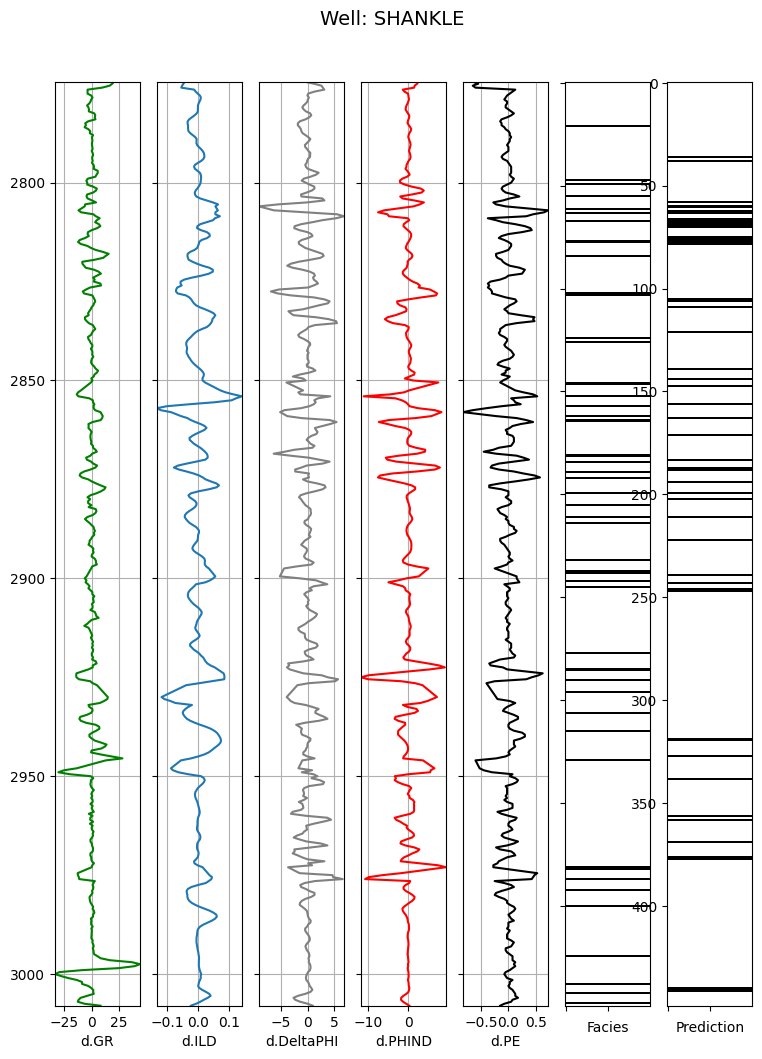

In [8]:
#compare_facies_plot(test_well, 'Prediction', facies_colors)
compare_facies_plot_der(test_well)
plt.show()